# Instructor Do: Random Forests

In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline


## Loading and Preprocessing Loans Encoded Data

In [2]:
# Loading data
df_old = pd.read_csv("summer_all_days.csv")
df_old.head()

,Unnamed: 0,_c0,DateTimeStamp,LKSPOMET_ATemp,LKSPOMET_F_ATemp,LKSBAWQ_Temp,LKSBAWQ_F_Temp,LKSPOMET_WSpd,LKSPOMET_F_WSpd,LKSBAWQ_Depth,...,LKSPOMET_TotPrcp,LKSPOMET_F_TotPrcp,LKSBAWQ_Turb,LKSBAWQ_F_Turb,Date,Time,Turbidity_Range,Month,Day,Year
0,0,121310,06/17/2021 13:30,27.5,<0>,22.0,<0>,3.5,<0>,1.22,...,0.0,<0>,11.0,<0>,06/17/2021,2023-06-07 13:30:00,</=15,6,17,2021
1,1,121311,06/17/2021 13:45,27.5,<0>,21.9,<0>,3.5,<0>,1.21,...,0.0,<0>,11.0,<0>,06/17/2021,2023-06-07 13:45:00,</=15,6,17,2021
2,2,121312,06/17/2021 14:00,27.4,<0>,22.1,<0>,2.4,<0>,1.23,...,0.0,<0>,12.0,<0>,06/17/2021,2023-06-07 14:00:00,</=15,6,17,2021
3,3,121313,06/17/2021 14:15,27.5,<0>,22.1,<0>,1.9,<0>,1.24,...,0.0,<0>,10.0,<0>,06/17/2021,2023-06-07 14:15:00,</=10,6,17,2021
4,4,121314,06/17/2021 14:30,28.1,<0>,22.0,<0>,1.1,<0>,1.28,...,0.0,<0>,11.0,<0>,06/17/2021,2023-06-07 14:30:00,</=15,6,17,2021


In [3]:
 
df = df_old[[       'Month',
                     'LKSPOMET_ATemp', 
                     'LKSBAWQ_Temp',
                    'LKSBAWQ_ChlFluor',
                    'LKSPOMET_WSpd', 
                    'LKSBAWQ_Depth',
                    'LKSBAWQ_pH',
                     'Turbidity_Range',
                   ]]
df.head()

,Month,LKSPOMET_ATemp,LKSBAWQ_Temp,LKSBAWQ_ChlFluor,LKSPOMET_WSpd,LKSBAWQ_Depth,LKSBAWQ_pH,Turbidity_Range
0,6,27.5,22.0,13.8,3.5,1.22,7.9,</=15
1,6,27.5,21.9,14.2,3.5,1.21,7.9,</=15
2,6,27.4,22.1,13.7,2.4,1.23,7.9,</=15
3,6,27.5,22.1,13.0,1.9,1.24,7.9,</=10
4,6,28.1,22.0,13.4,1.1,1.28,7.9,</=15


In [4]:
# Define features set
X = df.copy()
X.drop("Turbidity_Range", axis=1, inplace=True)
X.head()

,Month,LKSPOMET_ATemp,LKSBAWQ_Temp,LKSBAWQ_ChlFluor,LKSPOMET_WSpd,LKSBAWQ_Depth,LKSBAWQ_pH
0,6,27.5,22.0,13.8,3.5,1.22,7.9
1,6,27.5,21.9,14.2,3.5,1.21,7.9
2,6,27.4,22.1,13.7,2.4,1.23,7.9
3,6,27.5,22.1,13.0,1.9,1.24,7.9
4,6,28.1,22.0,13.4,1.1,1.28,7.9


In [5]:
# Define target vector
y = df["Turbidity_Range"].ravel()
y[:500]

array(['</=15', '</=15', '</=15', '</=10', '</=15', '</=15', '</=10',
       '</=15', '</=10', '</=15', '</=15', '</=15', '</=15', '</=10',
       '</=15', '</=15', '</=15', '</=15', '</=15', '</=15', '</=15',
       '</=15', '</=15', '</=15', '</=15', '</=15', '</=10', '</=15',
       '</=15', '</=15', '</=15', '</=15', '</=15', '</=15', '</=15',
       '</=15', '</=15', '</=15', '</=15', '</=15', '</=15', '</=15',
       '</=10', '</=15', '</=10', '</=10', '</=15', '</=15', '</=10',
       '</=15', '</=15', '</=15', '</=15', '</=15', '</=15', '</=15',
       '</=15', '</=15', '</=10', '</=15', '</=15', '</=10', '</=10',
       '</=10', '</=10', '</=15', '</=15', '</=15', '</=15', '</=15',
       '</=15', '</=15', '</=10', '</=10', '</=10', '</=15', '</=15',
       '</=15', '</=15', '</=15', '</=15', '</=15', '</=15', '</=15',
       '</=15', '</=15', '</=15', '</=15', '</=15', '</=15', '</=15',
       '</=15', '</=15', '</=15', '</=15', '</=15', '</=15', '</=15',
       '</=15', '</=

In [6]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [7]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [8]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [9]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Random Forest Model

In [10]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=150, random_state=78)

In [11]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

## Making Predictions Using the Random Forest Model

In [12]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

## Model Evaluation

In [13]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual </=5", "Actual </=10", "Actual </=15", "Actual </=20", "Actual </=25", "Actual </=30"], 
        columns=["Actual </=5", "Predicted </=10", "Predicted </15", "Predicted </=20", "Predicted </=25", "Predicted </=30"])
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [14]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Actual </=5,Predicted </=10,Predicted </15,Predicted </=20,Predicted </=25,Predicted </=30
Actual </=5,947,117,0,0,0,94
Actual </=10,105,1209,7,0,0,1
Actual </=15,4,48,28,5,0,1
Actual </=20,1,6,3,5,0,0
Actual </=25,1,1,1,2,0,0
Actual </=30,168,2,0,0,0,699


Accuracy Score : 0.83589001447178
Classification Report
              precision    recall  f1-score   support

       </=10       0.77      0.82      0.79      1158
       </=15       0.87      0.91      0.89      1322
       </=20       0.72      0.33      0.45        86
       </=25       0.42      0.33      0.37        15
       </=30       0.00      0.00      0.00         5
        </=5       0.88      0.80      0.84       869

    accuracy                           0.84      3455
   macro avg       0.61      0.53      0.56      3455
weighted avg       0.83      0.84      0.83      3455



C:\Users\katel\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\katel\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\katel\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Feature Importance

In [15]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.251851421999639, 'LKSBAWQ_ChlFluor'),
 (0.17919523759830364, 'LKSBAWQ_pH'),
 (0.15682088719271187, 'LKSBAWQ_Temp'),
 (0.11504377178681291, 'Month'),
 (0.11403993836252374, 'LKSPOMET_ATemp'),
 (0.10190711987686403, 'LKSBAWQ_Depth'),
 (0.08114162318314494, 'LKSPOMET_WSpd')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

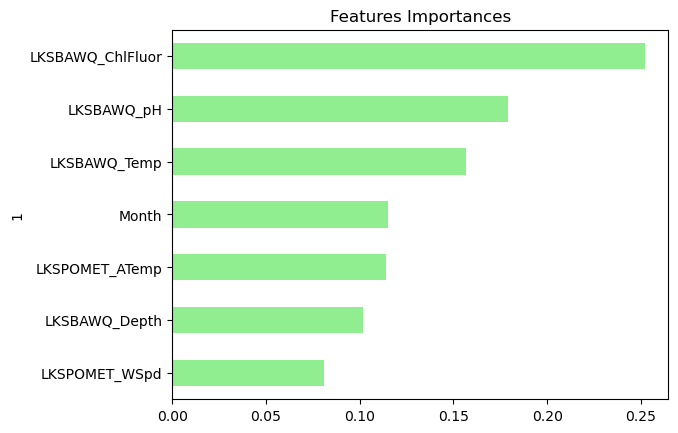

In [16]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)